In [40]:
from tensorflow import keras #remember that keras is now included in tensorflow
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix


In [41]:
#define some parametes related to specific training problem
batch_size = 128 #reduce this if you want to run this locally, at your pc
num_classes = 10 #this is problem specific
epochs = 10 # to save some time. Typically you need more that 100.

# input image dimensions
img_rows, img_cols = 32, 32

In [42]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#split x train to train and validation set 
(x_train,y_train),(x_valid,y_valid)=(x_train[:40000],y_train[:40000]),(x_train[40000:],y_train[40000:])

#scaling the data 
X_train= x_train/255
X_test=x_test/255
X_valid=x_valid/255

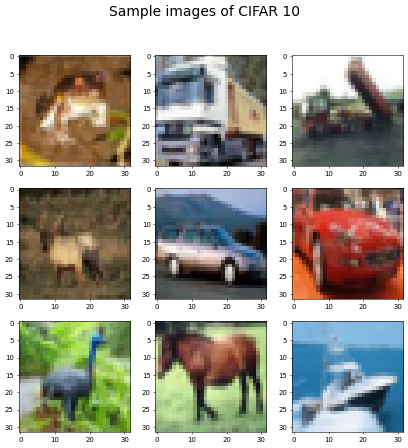

In [43]:
my_dpi = 50
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), dpi=my_dpi)
# title for entire figure
fig.suptitle('Sample images of CIFAR 10', fontsize=20)
axes[0, 0]=plt.subplot(331)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
axes[0,1]=plt.subplot(332)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
axes[0,2]=plt.subplot(333)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
axes[1,0]=plt.subplot(334)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
axes[1,1]=plt.subplot(335)
plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
axes[1,2]=plt.subplot(336)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
axes[2,0]=plt.subplot(337)
plt.imshow(x_train[6], cmap=plt.get_cmap('gray'))
axes[2,1]=plt.subplot(338)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
axes[2,2]=plt.subplot(339)
plt.imshow(x_train[8], cmap=plt.get_cmap('gray'))
fig.savefig('Sample_images_CIFAR10.png')

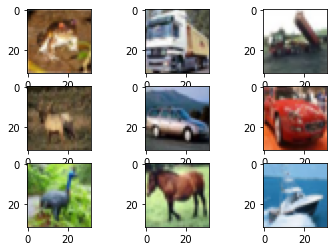

AttributeError: 'tuple' object has no attribute 'savefig'

In [56]:
# plot 9 images as gray scale
fig= plt.subplots()
plt.subplot(331)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(335)
plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(336)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(337)
plt.imshow(x_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(338)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(339)
plt.imshow(x_train[8], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
plt.pause(4)
fig.savefig('sample_image_CIFAR_10.png')

In [ ]:
# reshaping the data to appropriate tensor format
X_train = X_train.reshape(40000, 32, 32,3 )
X_test = X_test.reshape(10000, 32, 32, 3)
X_valid= X_valid.reshape(10000,32,32,3)
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0],'valid samples')
print(X_test.shape[0], 'test samples')

In [45]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
# here we define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='rel'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [47]:
#do not forget to compile the structure here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [48]:
# print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1605760   
                                                      

In [49]:
with open('modelsummary.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

In [53]:
from keras.utils import plot_model
plot_model(model.summary(), to_file='model.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1605760   
                                                      

AttributeError: 'NoneType' object has no attribute 'built'

In [16]:

# fit model parameters, given a set of training data
history= model.fit(X_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid)) 


Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7152 - accuracy: 0.7388 - val_loss: 0.9649 - val_accuracy: 0.6823
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6934 - accuracy: 0.7475 - val_loss: 0.9762 - val_accuracy: 0.6797
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6657 - accuracy: 0.7580 - val_loss: 0.9245 - val_accuracy: 0.6992
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6335 - accuracy: 0.7673 - val_loss: 0.9679 - val_accuracy: 0.6917
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6120 - accuracy: 0.7767 - val_loss: 0.9787 - val_accuracy: 0.6948
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5919 - accuracy: 0.7804 - val_loss: 0.9897 - val_accuracy: 0.6931
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5721 - accuracy: 0.7905 - val_loss: 0.9881 - val_accuracy:

In [11]:
# calculate some common performance scores
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9091642498970032
Test accuracy: 0.6866999864578247


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving the trained model
model_name = 'cifar10_CNN.h5'
model.save(model_name)

In [14]:
#loading a trained model & use it over test data
loaded_model = keras.models.load_model('/content/drive/MyDrive/ml homework 2/cifar10_CNN (1).h5')

y_test_predictions_vectorized = loaded_model.predict(x_test)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
Y_test=np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


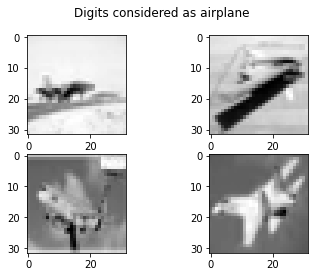

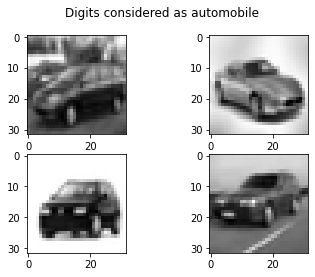

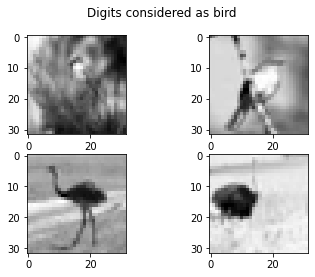

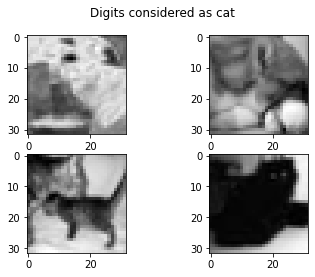

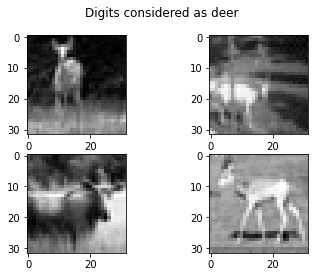

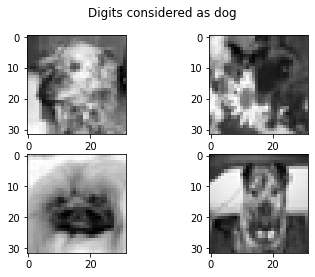

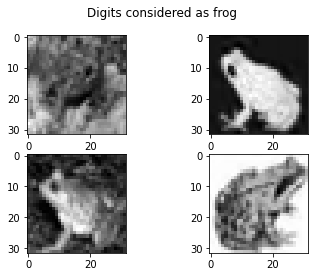

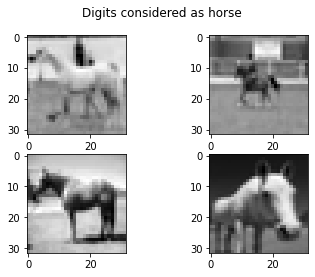

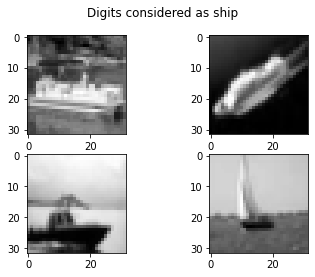

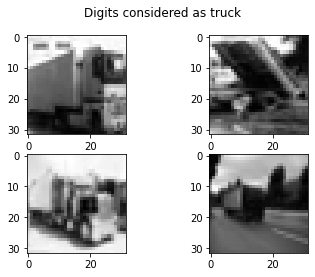

In [15]:
# illustrate few results
# class_to_demonstrate = random.randint(0, 9)

classes=['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']
# find 9 images the corespond to the above class,
# using the actual class as outputs

class_to_demonstrate = 0
while (sum(Y_test == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(Y_test == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 images as gray scale
    plt.subplot(221)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(222)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(223)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(224)
    plt.imshow(x_test[tmp_idxs_to_use[0][random.randint(0,len(np.where(Y_test==class_to_demonstrate)[0]))], :, :, 0], cmap=plt.get_cmap('gray'))
    tmp_title = 'Digits considered as ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1


In [54]:
import sys
import matplotlib.pyplot  as plt
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
  
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend()
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
  
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
  plt.legend()
	plt.close()


IndentationError: ignored

In [38]:
summarize_diagnostics(history)

In [50]:
import sys
import matplotlib.pyplot  as plt
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
  plt.xlabel('epoch iteration')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
  plt.xlabel('epoch iteration')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
  plt.legend()
	plt.close()


IndentationError: ignored